# NYC Real Estate Price Prediction Model

In [1471]:
import pandas as pd
import numpy as np

In [1472]:
#For Google Colab
#url ='https://raw.githubusercontent.com/akutayaydin/Magnimind-1/main/nyc-rolling-sales.csv'
#df = pd.read_csv(url)

In [1495]:
df = pd.read_csv('nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


We have both categorical and numerical variables

replace column name space with another character

In [1496]:
df.columns = df.columns.str.replace(' ', '_')

Drop unwanted columns

In [1497]:
#X = df[df['BUILDING_CLASS_AT_TIME_OF_SALE'].isin(['A2'])]
#print(X)

In [1498]:
df = df.drop(['Unnamed:_0','EASE-MENT','BLOCK','LOT','ADDRESS','APARTMENT_NUMBER','ZIP_CODE','BUILDING_CLASS_AT_PRESENT','TAX_CLASS_AT_PRESENT','BUILDING_CLASS_CATEGORY'], axis =1)
              

> Change Request: 
>1. Look for Unique Values of BUILDING_CLASS_AT_TIME_OF_SALE Columns
2. Assign Unknown or other to empty rows - No empty values
3. BUILDING_CLASS_AT_TIME_OF_SALE - Reduce the model performance
4. Created a new category - Deleted digits from building class and tried the model but the model performance went down


In [1499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   RESIDENTIAL_UNITS               84548 non-null  int64 
 3   COMMERCIAL_UNITS                84548 non-null  int64 
 4   TOTAL_UNITS                     84548 non-null  int64 
 5   LAND_SQUARE_FEET                84548 non-null  object
 6   GROSS_SQUARE_FEET               84548 non-null  object
 7   YEAR_BUILT                      84548 non-null  int64 
 8   TAX_CLASS_AT_TIME_OF_SALE       84548 non-null  int64 
 9   BUILDING_CLASS_AT_TIME_OF_SALE  84548 non-null  object
 10  SALE_PRICE                      84548 non-null  object
 11  SALE_DATE                       84548 non-null  object
dtypes: int64(6), object(6)
memory usage: 7.7+ MB


In [1500]:
tax_uniq_cat = df['TAX_CLASS_AT_TIME_OF_SALE'].unique()
print('No. of unique values: ' +str(df['TAX_CLASS_AT_TIME_OF_SALE'].unique().size))
print(np.sort(tax_uniq_cat))

building_class_uniq_cat = df['BUILDING_CLASS_AT_TIME_OF_SALE'].unique()
print('No. of unique values: ' +str(df['BUILDING_CLASS_AT_TIME_OF_SALE'].unique().size))
print(np.sort(building_class_uniq_cat))


No. of unique values: 4
[1 2 3 4]
No. of unique values: 166
['A0' 'A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A9' 'B1' 'B2' 'B3' 'B9' 'C0'
 'C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'CM' 'D0' 'D1' 'D2' 'D3'
 'D4' 'D5' 'D6' 'D7' 'D8' 'D9' 'E1' 'E2' 'E7' 'E9' 'F1' 'F2' 'F4' 'F5'
 'F9' 'G0' 'G1' 'G2' 'G3' 'G4' 'G5' 'G6' 'G7' 'G8' 'G9' 'GU' 'GW' 'H1'
 'H2' 'H3' 'H4' 'H6' 'H8' 'H9' 'HB' 'HH' 'HR' 'HS' 'I1' 'I3' 'I4' 'I5'
 'I6' 'I7' 'I9' 'J1' 'J4' 'J5' 'J8' 'J9' 'K1' 'K2' 'K3' 'K4' 'K5' 'K6'
 'K7' 'K8' 'K9' 'L1' 'L3' 'L8' 'L9' 'M1' 'M2' 'M3' 'M4' 'M9' 'N2' 'N9'
 'O1' 'O2' 'O3' 'O4' 'O5' 'O6' 'O7' 'O8' 'O9' 'P2' 'P5' 'P6' 'P7' 'P8'
 'P9' 'Q1' 'Q8' 'Q9' 'R0' 'R1' 'R2' 'R3' 'R4' 'R5' 'R6' 'R7' 'R8' 'R9'
 'RA' 'RB' 'RG' 'RH' 'RK' 'RP' 'RR' 'RS' 'RT' 'RW' 'S0' 'S1' 'S2' 'S3'
 'S4' 'S5' 'S9' 'T2' 'U1' 'U6' 'V0' 'V1' 'V2' 'V3' 'V6' 'V9' 'W1' 'W2'
 'W3' 'W4' 'W6' 'W8' 'W9' 'Y1' 'Y3' 'Z0' 'Z2' 'Z3' 'Z7' 'Z9']


In [1501]:
df_null_tax = df[df['TAX_CLASS_AT_TIME_OF_SALE'].isin([np.nan,np.inf,-np.inf,''])]
print(df_null_tax)

df_null_building = df[df['BUILDING_CLASS_AT_TIME_OF_SALE'].isin([np.nan,np.inf,-np.inf,''])]
print(df_null_building)

Empty DataFrame
Columns: [BOROUGH, NEIGHBORHOOD, RESIDENTIAL_UNITS, COMMERCIAL_UNITS, TOTAL_UNITS, LAND_SQUARE_FEET, GROSS_SQUARE_FEET, YEAR_BUILT, TAX_CLASS_AT_TIME_OF_SALE, BUILDING_CLASS_AT_TIME_OF_SALE, SALE_PRICE, SALE_DATE]
Index: []
Empty DataFrame
Columns: [BOROUGH, NEIGHBORHOOD, RESIDENTIAL_UNITS, COMMERCIAL_UNITS, TOTAL_UNITS, LAND_SQUARE_FEET, GROSS_SQUARE_FEET, YEAR_BUILT, TAX_CLASS_AT_TIME_OF_SALE, BUILDING_CLASS_AT_TIME_OF_SALE, SALE_PRICE, SALE_DATE]
Index: []


In [1502]:
df['CAT_BUILDING_CLASS'] = df['BUILDING_CLASS_AT_TIME_OF_SALE']
for i in range (0,10):
    df['CAT_BUILDING_CLASS']= df['CAT_BUILDING_CLASS'].str.replace(str(i),'')
df.head()

,BOROUGH,NEIGHBORHOOD,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,CAT_BUILDING_CLASS
0,1,ALPHABET CITY,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,C
1,1,ALPHABET CITY,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00,C
2,1,ALPHABET CITY,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00,C
3,1,ALPHABET CITY,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,C
4,1,ALPHABET CITY,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,C


here is the list of variables

In [1503]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS',
       'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE', 'CAT_BUILDING_CLASS'],
      dtype='object')

In [1504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   RESIDENTIAL_UNITS               84548 non-null  int64 
 3   COMMERCIAL_UNITS                84548 non-null  int64 
 4   TOTAL_UNITS                     84548 non-null  int64 
 5   LAND_SQUARE_FEET                84548 non-null  object
 6   GROSS_SQUARE_FEET               84548 non-null  object
 7   YEAR_BUILT                      84548 non-null  int64 
 8   TAX_CLASS_AT_TIME_OF_SALE       84548 non-null  int64 
 9   BUILDING_CLASS_AT_TIME_OF_SALE  84548 non-null  object
 10  SALE_PRICE                      84548 non-null  object
 11  SALE_DATE                       84548 non-null  object
 12  CAT_BUILDING_CLASS              84548 non-null

LAND_SQUARE_FEET, GROSS_SQUARE_FEET and SALE_PRICE has object type but they are actually numerical variables

Investigate for non numeric values

In [1505]:
X = df['LAND_SQUARE_FEET'].str.isnumeric()
Y = df['GROSS_SQUARE_FEET'].str.isnumeric()
Z = df['SALE_PRICE'].str.isnumeric()

In [1506]:
print(df[~X]['LAND_SQUARE_FEET'].nunique())
print(df[~Y]['GROSS_SQUARE_FEET'].nunique())
print(df[~Z]['SALE_PRICE'].nunique())

1
1
1


In [1507]:
print(np.unique(df[~X].iloc[:,5]))
print(np.unique(df[~Y].iloc[:,6]))
print(np.unique(df[~Z].iloc[:,10]))

[' -  ']
[' -  ']
[' -  ']


Because of '-' they are object type variables. Turn these variables to numerical type

In [1508]:
numeric = ['LAND_SQUARE_FEET','GROSS_SQUARE_FEET','SALE_PRICE']

df[numeric] = df[numeric].apply(pd.to_numeric, errors = 'coerce')

Split Sale Date to create year column

In [1509]:
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'], errors='coerce')

In [1510]:
df['SALE_YEAR'] = pd.DatetimeIndex(df['SALE_DATE']).year

In [1511]:
df = df.drop('SALE_DATE', axis =1)

Drop all rows with missing sales prices

In [1512]:
df = df.dropna(subset=['SALE_PRICE'])

In [1513]:
df_null = df[df['SALE_PRICE'].isin([np.nan,np.inf,-np.inf])]

In [1514]:
df_null

,BOROUGH,NEIGHBORHOOD,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,CAT_BUILDING_CLASS,SALE_YEAR


In [1515]:
df['SALE_PRICE'].isnull().sum()

0

Analyze data

In [1516]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1517]:
df.describe()

,BOROUGH,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_YEAR
count,69987.000000,69987.000000,69987.000000,69987.000000,4.879900e+04,4.824800e+04,69987.000000,69987.000000,6.998700e+04,69987.000000
mean,2.921928,1.899553,0.172489,2.092203,3.629395e+03,3.672552e+03,1799.348236,1.641976,1.276456e+06,2016.655065
std,1.235688,14.549545,9.123717,17.276100,4.035784e+04,2.947540e+04,520.884552,0.771162,1.140526e+07,0.475351
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00,2016.000000
25%,2.000000,0.000000,0.000000,0.000000,1.438000e+03,8.280000e+02,1920.000000,1.000000,2.250000e+05,2016.000000
50%,3.000000,1.000000,0.000000,1.000000,2.150000e+03,1.620000e+03,1937.000000,2.000000,5.300000e+05,2017.000000
75%,4.000000,2.000000,0.000000,2.000000,3.100000e+03,2.520000e+03,1965.000000,2.000000,9.500000e+05,2017.000000
max,5.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09,2017.000000


>Change Request: Divide and Group Numerical Values and Create Categorical Features
>1. Analyzed relationship between Commercial Unit and Sale Price using Box plot and Scatter Plot 
2. Divided number of Commercial Units to 5 Categories. Grouped by similar IQR and Median values. 
3. Created New Categorical Feature (CAT_COMMERCIAL_UNITS) 
4. The model accuracy increased
5. Tried to catagorize RESIDENTIAL UNITS but model accuracy significantly decreased.

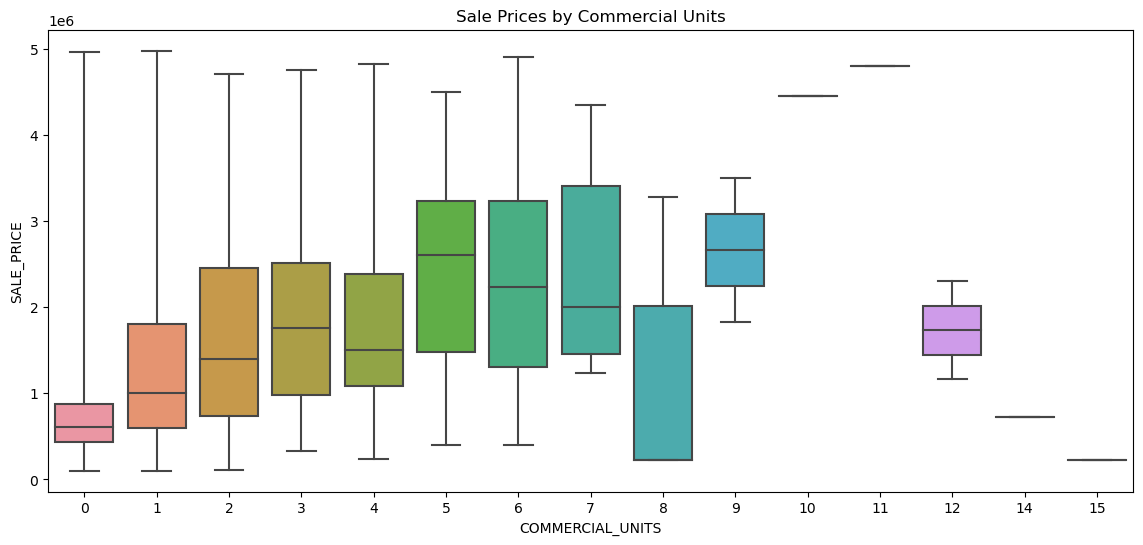

In [1518]:
data = df.dropna(subset = ['SALE_PRICE','COMMERCIAL_UNITS'])
data = data[(data['COMMERCIAL_UNITS']<20)&
           (data['SALE_PRICE']<5000000)&
           (data['SALE_PRICE']>100000)&
           (data['GROSS_SQUARE_FEET']>0)]

plt.figure(figsize=(14,6))

sns.boxplot(x ='COMMERCIAL_UNITS',y='SALE_PRICE',data =data, whis=10)
#sns.boxplot(x ='RESIDENTIAL_UNITS',y='SALE_PRICE',data =data, whis=10)
plt.title('Sale Prices by Commercial Units');
plt.show()

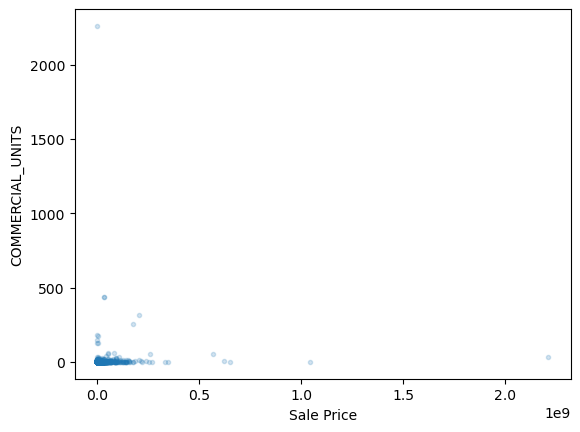

In [1519]:
data_new = df.dropna(subset = ['SALE_PRICE','COMMERCIAL_UNITS'])
plt.plot(data_new['SALE_PRICE'],data_new['COMMERCIAL_UNITS'],'o',markersize = 3,alpha =0.2)
plt.xlabel('Sale Price')
plt.ylabel('COMMERCIAL_UNITS')
plt.show()

In [1520]:
bins = [-1,0,5,6,7,100]
category = ['No units','1-5 Units', '6 Units','7 Units','11+ Units']
df['CAT_COMMERCIAL_UNITS'] = pd.cut(df['COMMERCIAL_UNITS'], bins, labels=category)

#df_new = df[df['COMMERCIAL_UNITS'] == 8]
#df_new.head()

In [1521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69987 entries, 0 to 84547
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         69987 non-null  int64   
 1   NEIGHBORHOOD                    69987 non-null  object  
 2   RESIDENTIAL_UNITS               69987 non-null  int64   
 3   COMMERCIAL_UNITS                69987 non-null  int64   
 4   TOTAL_UNITS                     69987 non-null  int64   
 5   LAND_SQUARE_FEET                48799 non-null  float64 
 6   GROSS_SQUARE_FEET               48248 non-null  float64 
 7   YEAR_BUILT                      69987 non-null  int64   
 8   TAX_CLASS_AT_TIME_OF_SALE       69987 non-null  int64   
 9   BUILDING_CLASS_AT_TIME_OF_SALE  69987 non-null  object  
 10  SALE_PRICE                      69987 non-null  float64 
 11  CAT_BUILDING_CLASS              69987 non-null  object  
 12  SALE_YEAR         

In [1522]:
#bins = [-1,0,3,6,9,13,16,100]
#category = ['No units','1-3 Units', '4-6 Units','7-9 Units','10-13 Units','14-16 Units','16+ Units']
#df['CAT_RESIDENTIAL_UNITS'] = pd.cut(df['RESIDENTIAL_UNITS'], bins, labels=category)

#df_new = df[df['RESIDENTIAL_UNITS'] == 0]
#df_new.head()

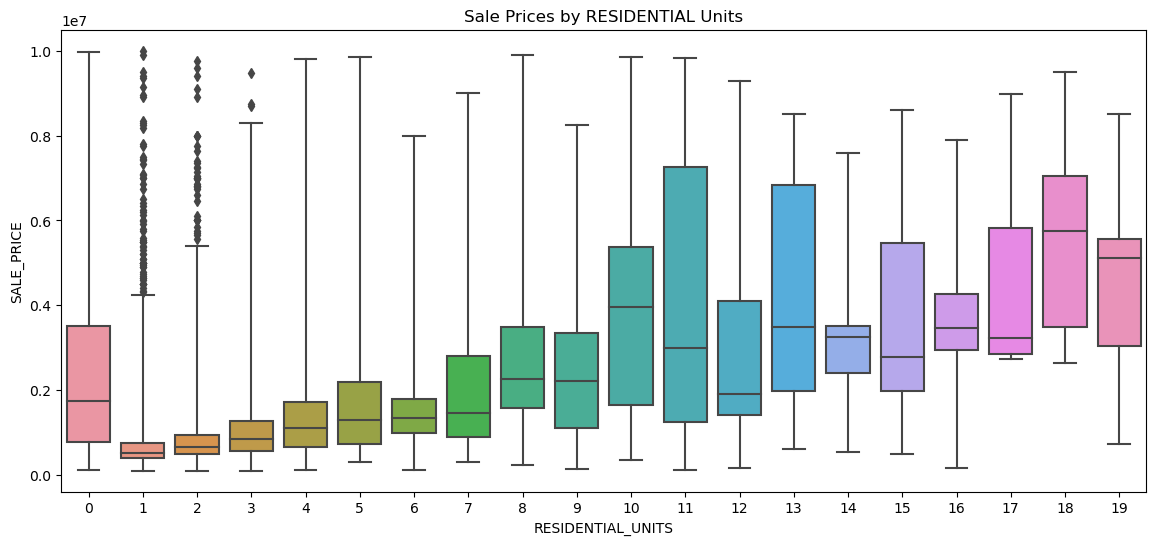

In [1523]:
data = df.dropna(subset = ['SALE_PRICE','RESIDENTIAL_UNITS'])
data = data[(data['RESIDENTIAL_UNITS']<20)&
           (data['SALE_PRICE']<10000000)&
           (data['SALE_PRICE']>100000)&
           (data['GROSS_SQUARE_FEET']>0)]

plt.figure(figsize=(14,6))

sns.boxplot(x ='RESIDENTIAL_UNITS',y='SALE_PRICE',data =data, whis=10)
#sns.boxplot(x ='RESIDENTIAL_UNITS',y='SALE_PRICE',data =data, whis=10)
plt.title('Sale Prices by RESIDENTIAL Units');
plt.show()

In [1524]:
df['CAT_COMMERCIAL_UNITS'].value_counts()

##df['CAT_RESIDENTIAL_UNITS'].value_counts()

No units     65924
1-5 Units     3874
11+ Units      110
6 Units         50
7 Units         19
Name: CAT_COMMERCIAL_UNITS, dtype: int64

>END OF CHANGE REQUEST

Eliminate the data with sale price is below 0 and year built is 0

In [1525]:
df = df[df['SALE_PRICE']>0]

Change Request: Age of the building is created as new variable.
>1. There are 158 unique values
2. There is a null value. It is eliminated from the data set
3. Investigated extreme YEAR_BUILT value 1111. I tried the model in both ways and model generated better results without this data.
4. I droped all year built rows with value 0.
5. Calculate Age of the building and add as a new column. There is a 0.1 correlation between sale price and age. This data can be a good feature for the model.

In [1526]:
print('No. of Different Values:' + str(df['YEAR_BUILT'].unique().size))
df['YEAR_BUILT'].unique()
#df['YEAR_BUILT'].max(),df['YEAR_BUILT'].min()

No. of Different Values:153


array([1900, 1913, 1920, 2009, 1925, 1902, 1928, 1910, 1930, 1935, 1937,
       1915, 1950, 1929, 1901, 1940, 2005,    0, 1989, 2014, 2008, 1965,
       2013, 2003, 2006, 2007, 1951, 1899, 1850, 1905, 1864, 1917, 1911,
       1983, 1926, 1963, 1960, 1889, 1898, 1939, 1938, 1927, 1909, 1958,
       1904, 1907, 1987, 1931, 1984, 1948, 2004, 1875, 2012, 1973, 2011,
       1922, 2001, 1932, 1980, 1908, 1953, 1906, 1921, 2010, 1111, 1918,
       1990, 1890, 1991, 1895, 1924, 2016, 1957, 1986, 1988, 1998, 1870,
       2015, 1969, 1956, 1982, 1914, 1903, 1967, 1912, 1964, 1955, 1961,
       1851, 2000, 1959, 1962, 1972, 1976, 1880, 1970, 1846, 1941, 1952,
       1923, 1896, 1985, 1966, 1981, 1954, 1946, 1947, 1975, 1974, 1968,
       2002, 1994, 1892, 1996, 1945, 1916, 1949, 1999, 1800, 1977, 1942,
       1979, 1978, 1971, 1919, 1894, 1881, 1936, 1997, 1995, 1933, 1934,
       1992, 1993, 1944, 1883, 1943, 1847, 1844, 1835, 1852, 1856, 1854,
       1832, 1845, 1849, 1855, 1893, 1865, 1882, 18

In [1527]:
print(df[df['YEAR_BUILT'] == 1111])

     BOROUGH NEIGHBORHOOD  RESIDENTIAL_UNITS  COMMERCIAL_UNITS  TOTAL_UNITS  \
957        1      CHELSEA                  0                 0            0   

     LAND_SQUARE_FEET  GROSS_SQUARE_FEET  YEAR_BUILT  \
957            2125.0                NaN        1111   

     TAX_CLASS_AT_TIME_OF_SALE BUILDING_CLASS_AT_TIME_OF_SALE  SALE_PRICE  \
957                          4                             G6   8208750.0   

    CAT_BUILDING_CLASS  SALE_YEAR CAT_COMMERCIAL_UNITS  
957                  G       2017             No units  


In [1528]:
df = df[df['YEAR_BUILT'] != 0]
df = df[df['YEAR_BUILT'] != 1111]

In [1529]:
df['AGE']  = 2023 - df['YEAR_BUILT']

In [1530]:
#sns.pairplot(df,vars= ['SALE_PRICE','AGE'], palette = 'husl', hue="CAT_COMMERCIAL_UNITS")

In [1531]:
df.corr()

,BOROUGH,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_YEAR,AGE
BOROUGH,1.000000,-0.019738,0.000680,-0.015842,0.023582,-0.086304,0.074782,-0.374458,-0.076983,-0.018976,-0.074782
RESIDENTIAL_UNITS,-0.019738,1.000000,0.013213,0.823166,0.430154,0.706839,-0.021600,0.005064,0.137850,-0.012076,0.021600
COMMERCIAL_UNITS,0.000680,0.013213,1.000000,0.578592,0.051836,0.065451,-0.004103,0.048396,0.047275,-0.006935,0.004103
TOTAL_UNITS,-0.015842,0.823166,0.578592,1.000000,0.380173,0.613405,-0.019263,0.033584,0.139350,-0.013805,0.019263
LAND_SQUARE_FEET,0.023582,0.430154,0.051836,0.380173,1.000000,0.615670,0.007225,0.070473,0.038963,-0.001680,-0.007225
GROSS_SQUARE_FEET,-0.086304,0.706839,0.065451,0.613405,0.615670,1.000000,0.009938,0.150445,0.508071,-0.009861,-0.009938
YEAR_BUILT,0.074782,-0.021600,-0.004103,-0.019263,0.007225,0.009938,1.000000,0.170272,0.002754,0.005720,-1.000000
TAX_CLASS_AT_TIME_OF_SALE,-0.374458,0.005064,0.048396,0.033584,0.070473,0.150445,0.170272,1.000000,0.109872,0.006642,-0.170272
SALE_PRICE,-0.076983,0.137850,0.047275,0.139350,0.038963,0.508071,0.002754,0.109872,1.000000,-0.002489,-0.002754
SALE_YEAR,-0.018976,-0.012076,-0.006935,-0.013805,-0.001680,-0.009861,0.005720,0.006642,-0.002489,1.000000,-0.005720


---END OF CHANGE REQUEST ---

Find the outliers for Gross Square Feet and LAND_SQUARE_FEET

Remove outliers of GROSS_SQUARE_FEET and LAND_SQUARE_FEET based on using +/- 3 std deviation

In [1532]:
gsf_mean = df['GROSS_SQUARE_FEET'].mean()
gsf_std = df['GROSS_SQUARE_FEET'].std()

gsf_cutoff = gsf_std * 3

gsf_upper_threshold, gsf_lower_threshold = gsf_mean + gsf_cutoff, gsf_mean - gsf_cutoff

df = df[(df['GROSS_SQUARE_FEET']> gsf_lower_threshold) & (df['GROSS_SQUARE_FEET']< gsf_upper_threshold)]
df = df[df['GROSS_SQUARE_FEET']!= 0]

In [1533]:
lsf_mean = df['LAND_SQUARE_FEET'].mean()
lsf_std = df['LAND_SQUARE_FEET'].std()

lsf_cutoff = lsf_std * 3

lsf_upper_threshold, lsf_lower_threshold = lsf_mean + lsf_cutoff, lsf_mean - lsf_cutoff

df = df[(df['LAND_SQUARE_FEET']> lsf_lower_threshold) & (df['LAND_SQUARE_FEET']< lsf_upper_threshold)]
df = df[df['LAND_SQUARE_FEET']!= 0]

In [1534]:
print(gsf_mean,gsf_std,gsf_cutoff,gsf_upper_threshold,gsf_lower_threshold )

3753.2706070905524 30820.11153688261 92460.33461064783 96213.60521773838 -88707.06400355727


>Change Request: I kept all three variables. No significant change on the model.

In [1535]:
#df = df[df['TOTAL_UNITS'] == df['RESIDENTIAL_UNITS'] + df['COMMERCIAL_UNITS']]
#df = df.drop(['RESIDENTIAL_UNITS','COMMERCIAL_UNITS'], axis = 1)

> End of Change Request

In [1536]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS',
       'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'CAT_BUILDING_CLASS', 'SALE_YEAR', 'CAT_COMMERCIAL_UNITS',
       'AGE'],
      dtype='object')

Remove unexpected values from the total units

In [1537]:
df = df[(df['TOTAL_UNITS'] > 0) & (df['TOTAL_UNITS'] != 2261)]

In [1538]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29040 entries, 0 to 84547
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         29040 non-null  int64   
 1   NEIGHBORHOOD                    29040 non-null  object  
 2   RESIDENTIAL_UNITS               29040 non-null  int64   
 3   COMMERCIAL_UNITS                29040 non-null  int64   
 4   TOTAL_UNITS                     29040 non-null  int64   
 5   LAND_SQUARE_FEET                29040 non-null  float64 
 6   GROSS_SQUARE_FEET               29040 non-null  float64 
 7   YEAR_BUILT                      29040 non-null  int64   
 8   TAX_CLASS_AT_TIME_OF_SALE       29040 non-null  int64   
 9   BUILDING_CLASS_AT_TIME_OF_SALE  29040 non-null  object  
 10  SALE_PRICE                      29040 non-null  float64 
 11  CAT_BUILDING_CLASS              29040 non-null  object  
 12  SALE_YEAR         

In [1539]:
import seaborn as sns
#sns.pairplot(df,hue='SALE_PRICE',palette='husl')
#sns.pairplot(df,vars = ['SALE_PRICE','LAND_SQUARE_FEET','GROSS_SQUARE_FEET','TOTAL_UNITS','AGE'],palette='husl')

In [1540]:
df.shape

(29040, 15)

In [1541]:
df.describe()

,BOROUGH,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_YEAR,AGE
count,29040.000000,29040.000000,29040.000000,29040.000000,29040.000000,29040.000000,29040.000000,29040.000000,2.904000e+04,29040.000000,29040.000000
mean,3.547107,2.379924,0.155888,2.534401,3253.101309,2894.653478,1940.485468,1.211054,1.212941e+06,2016.646556,82.514532
std,1.007660,5.335570,0.887317,5.468510,2662.204818,5430.009979,30.410546,0.654921,3.896005e+06,0.478047,30.410546
min,1.000000,0.000000,0.000000,1.000000,200.000000,120.000000,1800.000000,1.000000,1.000000e+00,2016.000000,6.000000
25%,3.000000,1.000000,0.000000,1.000000,2000.000000,1360.000000,1920.000000,1.000000,4.200000e+05,2016.000000,65.000000
50%,4.000000,2.000000,0.000000,2.000000,2500.000000,1864.000000,1930.000000,1.000000,6.200000e+05,2017.000000,93.000000
75%,4.000000,2.000000,0.000000,2.000000,3969.000000,2640.000000,1958.000000,1.000000,9.500000e+05,2017.000000,103.000000
max,5.000000,129.000000,62.000000,129.000000,41901.000000,95370.000000,2017.000000,4.000000,2.681242e+08,2017.000000,223.000000


In [1542]:
df.corr()

,BOROUGH,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_YEAR,AGE
BOROUGH,1.000000,-0.227817,-0.135216,-0.244078,0.107660,-0.247442,0.355424,-0.212964,-0.225731,-0.009900,-0.355424
RESIDENTIAL_UNITS,-0.227817,1.000000,0.070469,0.986907,0.258520,0.775409,-0.069121,0.153789,0.345696,-0.011577,0.069121
COMMERCIAL_UNITS,-0.135216,0.070469,1.000000,0.229896,0.193825,0.355932,-0.039060,0.494842,0.304076,-0.001296,0.039060
TOTAL_UNITS,-0.244078,0.986907,0.229896,1.000000,0.283631,0.814205,-0.073777,0.229590,0.386493,-0.011486,0.073777
LAND_SQUARE_FEET,0.107660,0.258520,0.193825,0.283631,1.000000,0.489737,0.081366,0.313632,0.244333,-0.017628,-0.081366
GROSS_SQUARE_FEET,-0.247442,0.775409,0.355932,0.814205,0.489737,1.000000,-0.035779,0.396346,0.536210,-0.008605,0.035779
YEAR_BUILT,0.355424,-0.069121,-0.039060,-0.073777,0.081366,-0.035779,1.000000,-0.046733,-0.057721,-0.008547,-1.000000
TAX_CLASS_AT_TIME_OF_SALE,-0.212964,0.153789,0.494842,0.229590,0.313632,0.396346,-0.046733,1.000000,0.311336,-0.000742,0.046733
SALE_PRICE,-0.225731,0.345696,0.304076,0.386493,0.244333,0.536210,-0.057721,0.311336,1.000000,0.000776,0.057721
SALE_YEAR,-0.009900,-0.011577,-0.001296,-0.011486,-0.017628,-0.008605,-0.008547,-0.000742,0.000776,1.000000,0.008547


# Creating Pipeline

Creating pipelines to transform numeric and non numeric variables

In [1543]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [1544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29040 entries, 0 to 84547
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         29040 non-null  int64   
 1   NEIGHBORHOOD                    29040 non-null  object  
 2   RESIDENTIAL_UNITS               29040 non-null  int64   
 3   COMMERCIAL_UNITS                29040 non-null  int64   
 4   TOTAL_UNITS                     29040 non-null  int64   
 5   LAND_SQUARE_FEET                29040 non-null  float64 
 6   GROSS_SQUARE_FEET               29040 non-null  float64 
 7   YEAR_BUILT                      29040 non-null  int64   
 8   TAX_CLASS_AT_TIME_OF_SALE       29040 non-null  int64   
 9   BUILDING_CLASS_AT_TIME_OF_SALE  29040 non-null  object  
 10  SALE_PRICE                      29040 non-null  float64 
 11  CAT_BUILDING_CLASS              29040 non-null  object  
 12  SALE_YEAR         

Creating Pipelines for Numeric and Categorical Features 
1. Impute
2. Scale
3. OneHotEncoder


In [1659]:
steps_num = [('imputer',SimpleImputer(missing_values = np.nan, strategy='mean')),
             ('scaler', StandardScaler())]
steps_cat = [('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]
              
numeric_transformer = Pipeline(steps = steps_num)
categorical_transformer = Pipeline(steps = steps_cat)

numeric_features = ['TOTAL_UNITS','LAND_SQUARE_FEET','GROSS_SQUARE_FEET','AGE','COMMERCIAL_UNITS','RESIDENTIAL_UNITS','YEAR_BUILT','SALE_YEAR',]
categorical_features = ['BOROUGH','NEIGHBORHOOD','CAT_COMMERCIAL_UNITS','TAX_CLASS_AT_TIME_OF_SALE']#,'CAT_BUILDING_CLASS','TAX_CLASS_AT_TIME_OF_SALE','BUILDING_CLASS_AT_TIME_OF_SALE']  


In [1660]:
preprocessor = ColumnTransformer(transformers = [('num',numeric_transformer,numeric_features),
                                                 ('cat',categorical_transformer,categorical_features)])


Test LinearRegression model

In [1661]:
reg = Pipeline(steps = [('preprocessor',preprocessor),
                       ('regressor',LinearRegression())])

In [1662]:
y = df.SALE_PRICE
X = df.drop('SALE_PRICE', axis =1)

In [1663]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state =42)

In [1664]:
clf = reg.fit(X_train,y_train)

In [1665]:
y_pred = reg.predict(X_test)
print(reg.predict(X_test))


[ -60459.61311165 1739723.78690097 1213746.06895546 ...  375291.68298287
  669717.32506786  256718.91545365]


Calculate loss function

In [1666]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

2280724.3986740215


In [1667]:
r2 = clf.score(X_test, y_test)
print(f"RFR: {r2}")

RFR: 0.5154032779317046


training performance is stable

In [1646]:
cv_results = cross_val_score(reg,X_train, y_train, scoring='r2', cv=10)
cv_results

array([0.43848521, 0.56104395, 0.57235371, 0.57588514, 0.06487805,
       0.22473794, 0.21851177, 0.42653832, 0.47467158, 0.16360959])

In [1647]:
cv_results = cross_val_score(reg,X_test, y_test, scoring='r2', cv=10)
cv_results

array([0.52826995, 0.22440935, 0.31051409, 0.6453618 , 0.36100478,
       0.624397  , 0.6744741 , 0.55999027, 0.43493617, 0.68094145])

In [1648]:
np.mean(cv_results)

0.5044298956992206

>Change Request: Test the data set with RandomForest model

> Result: model score decreased (Used a lot of CPU/Memory resource. I commented out the CV_results. 

> np.mean() 0.48011891060335865

In [1567]:
from sklearn.ensemble import RandomForestRegressor

In [1568]:
reg = Pipeline(steps = [('preprocessor',preprocessor),
                       ('regressor',RandomForestRegressor())])

In [ ]:
clf = reg.fit(X_train,y_train)

In [1569]:
y_pred = reg.predict(X_test)
print(reg.predict(X_test))

[ 197917.60833333 1324715.01666667  945933.84       ...  494138.29333333
  613869.72        395516.23333333]


In [1570]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

2450256.9878471824


In [1578]:
r2 = clf.score(X_test, y_test)
print(f"RFR: {r2}")

RFR: 0.4406828605492159


In [1571]:
#cv_results = cross_val_score(reg,X_train, y_train, scoring='r2', cv=5)
#cv_results

array([0.46835746, 0.53730154, 0.24966928, 0.51040391, 0.14112184])

In [1576]:
#cv_results = cross_val_score(reg,X_test, y_test, scoring='r2', cv=5)
#cv_results

array([0.28555374, 0.53066357, 0.53048786, 0.57019604, 0.48369334])

In [1577]:
#np.mean(cv_results)

0.48011891060335865

> Change Request: Test the data set with XGBoost model

> Result: model score decreased  

> with cross validation - np.mean() 0.47157691925726775

In [1618]:
from xgboost import XGBRegressor

In [1619]:
reg = Pipeline(steps = [('preprocessor',preprocessor),
                       ('regressor',XGBRegressor())])

In [1620]:
clf = reg.fit(X_train,y_train)

In [1621]:
y_pred = reg.predict(X_test)
print(reg.predict(X_test))

[ 321173.78 1396510.8  1100885.6  ...  479690.06  696763.3   438577.  ]


In [1622]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

2468855.026217997


In [1623]:
r2 = clf.score(X_test, y_test)
print(f"RFR: {r2}")

RFR: 0.4321599347698556


In [1624]:
cv_results = cross_val_score(reg,X_test, y_test, scoring='r2', cv=10)
cv_results

array([0.69162643, 0.17839607, 0.33837093, 0.68466606, 0.33142284,
       0.53399572, 0.36817372, 0.39657705, 0.4360493 , 0.75649107])

In [1625]:
np.mean(cv_results)

0.47157691925726775

> Change Request: Test the data set with Regularization (Lasso)

> Result: model score increased 

In [1669]:
from sklearn.linear_model import Lasso

In [1681]:
reg = Pipeline(steps = [('preprocessor',preprocessor),
                       ('regressor',Lasso(alpha=0.1))])

In [1682]:
clf = reg.fit(X_train,y_train)

/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.483447713033734e+16, tolerance: 34724311535558.777
  model = cd_fast.sparse_enet_coordinate_descent(


In [1683]:
y_pred = reg.predict(X_test)
print(reg.predict(X_test))

[ -60493.83737421 1739102.96923304 1214210.26704096 ...  374899.88712963
  670379.93323208  257482.7403184 ]


In [1684]:
r2 = clf.score(X_test, y_test)
print(f"RFR: {r2}")

RFR: 0.5152383620162488


> Change Request: Test the data set with Regularization (Ridge)

> Result: model score increased 

In [1689]:
from sklearn.linear_model import Ridge

In [1690]:
reg = Pipeline(steps = [('preprocessor',preprocessor),
                       ('regressor',Ridge(alpha=0.1))])

In [1691]:
clf = reg.fit(X_train,y_train)

In [1692]:
y_pred = reg.predict(X_test)
print(reg.predict(X_test))

[ -57596.88731657 1735075.71665429 1222732.2338102  ...  376561.84285583
  672073.9439297   254789.68182288]


In [1693]:
r2 = clf.score(X_test, y_test)
print(f"RFR: {r2}")

RFR: 0.5158031255819464


Test Kneighbor Regressor - Model performance significantly drops down

In [1626]:
clfpipe = Pipeline(steps = [('preprocessor',preprocessor),
                       ('clf',KNeighborsRegressor(n_neighbors =3))])

In [1627]:
clfpipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TOTAL_UNITS',
                                                   'LAND_SQUARE_FEET',
                                                   'GROSS_SQUARE_FEET', 'AGE',
                                                   'COMMERCIAL_UNITS',
                                                   'RESIDENTIAL_UNITS',
                                                   'YEAR_BUILT', 'SALE_YEAR']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BOROUGH', 'NEIGHBORHOOD',
                                                   'CAT_COMMERCIAL_UNITS'])])),
                ('clf', KNeighborsRegressor(n_neighbors=3))])

In [1628]:
clfpipe.predict(X_test)

array([ 388500.        , 1204000.        ,  982833.33333333, ...,
        470000.        ,  865175.66666667,  483000.        ])

In [1635]:
r2 = clfpipe.score(X_test, y_test)
print(f"RFR: {r2}")

RFR: 0.31578102525802576


# CODING ENDS HERE

Used a lot of resources to calculate- Commented out

In [1630]:
preprocessor.transformers_[0][1][0]

SimpleImputer()

In [1631]:
#param_grid = {'preprocessor__num__imputer__strategy':['mean','median'],
#              'clf__n_neighbors':np.arange(1,5,2)}

In [1632]:
#param_grid = {'clf__n_neighbors':np.arange(1,5,2)}

In [1633]:
#grid_search = GridSearchCV(clfpipe,param_grid,scoring ='accuracy', cv=5)

In [1634]:
#grid_search.fit(X_train,y_train)

/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklear

/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/Users/kutayaydin/opt/anaconda3/lib/python3.9/site-packages/sklear

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['TOTAL_UNITS',
                                                                          'LAND_SQUARE_FEET',
                                                                          'GROSS_SQUARE_FEET',
                                                                          'AGE',
                                                                          'COMMERCIAL_UNITS',
                                                                          'RESIDENTIAL_UNITS',
                                                                          'YEAR_BUILT',
                                                                          'SALE_YEAR']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['BOROUGH',
                                                                          'NEIGHBORHOOD',
                                                                          'CAT_COMMERCIAL_UNITS'])])),
                                       ('clf',
                                        KNeighborsRegressor(n_neighbors=3))]),
             param_grid={'clf__n_neighbors': array([1, 3]),
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             scoring='accuracy')

In [473]:
#grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TOTAL_UNITS',
                                                   'LAND_SQUARE_FEET',
                                                   'GROSS_SQUARE_FEET',
                                                   'YEAR_BUILT', 'SALE_YEAR']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BOROUGH', 'NEIGHBORHOOD',
                                                   'TAX_CLASS_AT_TIME_OF_SALE',
                                                   'BUILDING_CLASS_AT_TIME_OF_SALE'])])),
                ('clf', KNeighborsClassifier(n_neighbors=1))])

In [474]:
#grid_search.best_score_

0.02006928943452381